### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [6]:
import tensorflow as tf
tf.set_random_seed(42)

In [7]:
tf.__version__

'1.10.0'

### Collect Data

In [8]:
import keras

Using TensorFlow backend.


In [9]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 1us/step


In [12]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [22]:
trainY = tf.keras.utils.to_categorical(trainY)

In [23]:
testY = tf.keras.utils.to_categorical(testY)

#### Expected Output should look like this

In [24]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

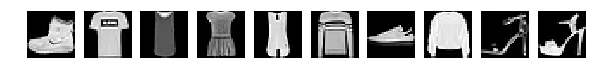

label for each of the above image:
9 0 0 3 0 2 7 2 5 5


In [77]:
plt.plot

#### Expected Output

0


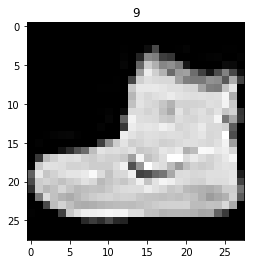

1


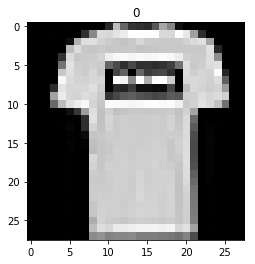

2


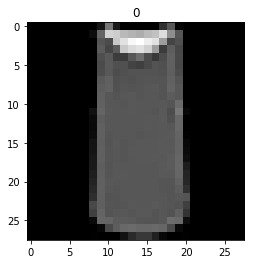

3


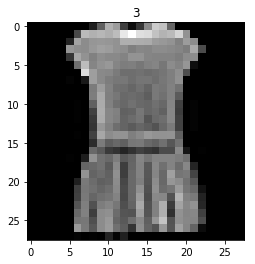

4


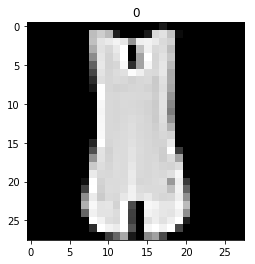

5


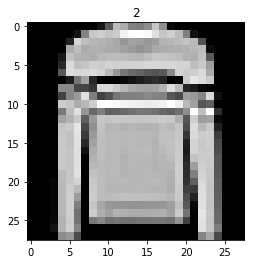

6


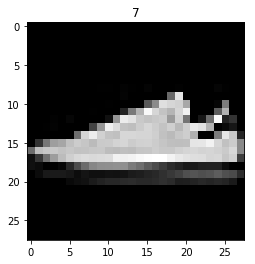

7


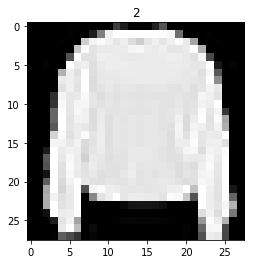

8


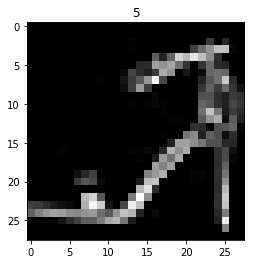

9


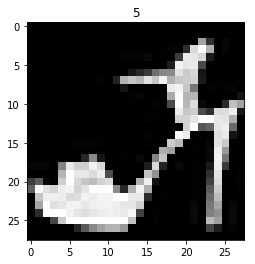

In [27]:
import matplotlib.pyplot as plt
labels = [9, 0, 0, 3, 0, 2, 7, 2, 5, 5]
for i in range(10):
    print(i)
    plt.title(labels[i])
    plt.imshow(trainX[i], cmap="gray")
    plt.show()


### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [28]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model using model.fit()

In [29]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=5,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.5967 - acc: 0.7967 - val_loss: 0.5110 - val_acc: 0.8263
Epoch 2/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.4889 - acc: 0.8303 - val_loss: 0.4847 - val_acc: 0.8332
Epoch 3/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.4683 - acc: 0.8393 - val_loss: 0.4802 - val_acc: 0.8335
Epoch 4/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.4581 - acc: 0.8439 - val_loss: 0.4732 - val_acc: 0.8369
Epoch 5/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.4498 - acc: 0.8451 - val_loss: 0.4669 - val_acc: 0.8394


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [30]:
#Initialize Sequential model
model1 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model1.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model1.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [31]:
model1.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=5,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.5964 - acc: 0.7956 - val_loss: 0.5144 - val_acc: 0.8237
Epoch 2/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.4900 - acc: 0.8319 - val_loss: 0.4854 - val_acc: 0.8323
Epoch 3/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.4663 - acc: 0.8389 - val_loss: 0.4822 - val_acc: 0.8334
Epoch 4/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.4565 - acc: 0.8426 - val_loss: 0.4747 - val_acc: 0.8403
Epoch 5/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.4475 - acc: 0.8464 - val_loss: 0.4688 - val_acc: 0.8410


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [32]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)
model1.compile(optimizer=sgd_optimizer, loss='mse')

In [33]:
model1.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=5,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.0217 - val_loss: 0.0229
Epoch 2/5
60000/60000 [==============================] - 3s 56us/step - loss: 0.0216 - val_loss: 0.0228
Epoch 3/5
60000/60000 [==============================] - 3s 56us/step - loss: 0.0216 - val_loss: 0.0229
Epoch 4/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.0215 - val_loss: 0.0228
Epoch 5/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.0217 - val_loss: 0.0229


### Build the Neural Network model with 3 Dense layers with 30(feel free to play with the no.of neurons and the layers),10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [35]:
#Initialize Sequential model
model2 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model2.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model2.add(tf.keras.layers.BatchNormalization())

In [36]:
#Add 1st hidden layer
model2.add(tf.keras.layers.Dense(45, activation='sigmoid'))
#Add 2nd hidden layer
model2.add(tf.keras.layers.Dense(20, activation='sigmoid'))
#Add 3rd hidden layer
model2.add(tf.keras.layers.Dense(45, activation='sigmoid'))

In [37]:
#Add OUTPUT layer
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

## Review model

In [38]:
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model2.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_2 (Dense)              (None, 45)                35325     
_________________________________________________________________
dense_3 (Dense)              (None, 20)                920       
_________________________________________________________________
dense_4 (Dense)              (None, 45)                945       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                460       
Total params: 40,786
Trainable params: 39,218
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [39]:
model2.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=30,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 6s 102us/step - loss: 1.9619 - acc: 0.3575 - val_loss: 1.4111 - val_acc: 0.5429
Epoch 2/30
60000/60000 [==============================] - 5s 82us/step - loss: 1.1321 - acc: 0.6213 - val_loss: 0.9137 - val_acc: 0.6808
Epoch 3/30
60000/60000 [==============================] - 5s 81us/step - loss: 0.8081 - acc: 0.7195 - val_loss: 0.6981 - val_acc: 0.7582
Epoch 4/30
60000/60000 [==============================] - 5s 85us/step - loss: 0.6501 - acc: 0.7741 - val_loss: 0.5843 - val_acc: 0.7909
Epoch 5/30
60000/60000 [==============================] - 5s 81us/step - loss: 0.5648 - acc: 0.8014 - val_loss: 0.5292 - val_acc: 0.8135
Epoch 6/30
60000/60000 [==============================] - 5s 84us/step - loss: 0.5118 - acc: 0.8211 - val_loss: 0.4968 - val_acc: 0.8256
Epoch 7/30
60000/60000 [==============================] - 6s 98us/step - loss: 0.4809 - acc: 0.8324 - val_loss: 0.4714 - val_ac